<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/YouTube_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
comments= pd.read_csv("UScomments.csv",on_bad_lines="skip")
comments.head()
## lets find out missing values in your data
comments.isnull().sum()
## drop missing values as we have very few & lets update dataframe as well..
comments.dropna(inplace=True)
comments.isnull().sum()


<ipython-input-3-e756e61d990a>:5: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments= pd.read_csv("UScomments.csv",on_bad_lines="skip")


,0
video_id,0
comment_text,0
likes,0
replies,0


## 2.. Perform Sentiment Analysis
    
    In short , Sentiment analysis is all about analyszing sentiments of Users

In [ ]:
!pip install textblob
### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [4]:
from textblob import TextBlob
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [5]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

### its a neutral sentence !

0.0

In [6]:
## for those of you who dont have good specifications , considering sample of data is a good option !
from textblob import TextBlob

##sample_df = comments[0:1000]
##sample_df.head()

polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

comments['polarity']  = polarity

### Inserting polarity values into comments dataframe while defining feature name as "polarity"
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [7]:
from textblob import TextBlob
comments.head(6)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0


## 3..  Wordcloud Analysis of your data

In [8]:
filter1 = comments['polarity']==1

comments_positive = comments[filter1]
comments_positive.head()

filter2 = comments['polarity']==-1

comments_negative = comments[filter2]
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [ ]:
pip install wordcloud

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
set(STOPWORDS)
type(comments['comment_text'])


pandas.core.series.Series

For Positive words

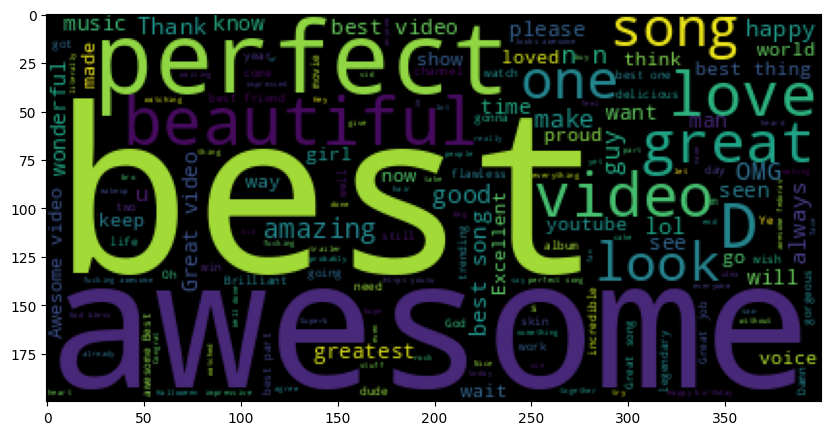

In [10]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_comments_positive = ' '.join(comments_positive['comment_text'])
wordcloud = WordCloud(stopwords=STOPWORDS).generate(total_comments_positive)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

For Negative words

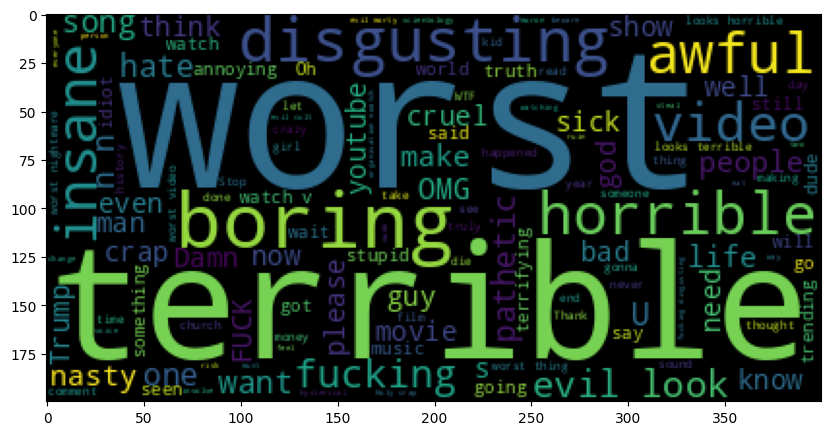

In [11]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
wordcloud_neg = WordCloud(stopwords=STOPWORDS).generate(total_comments_negative)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_neg)

## 4.. Perform Emoji's Analysis

In [13]:
!pip install emoji==2.2.0 ## 2.2.0 is a most stable version till date , hence installing this version makes sense !

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234910 sha256=7947b5fbdcbb8fcff355522ce7b385e078441853642b5316284fa36874c88475
  Stored in directory: /root/.cache/pip/wheels/a1/d5/63/4dbdee6f4e23f24b771ea5ac6c9ebe3d7e227028c60e06ead3
Successfully built emoji


In [14]:
import emoji
comments['comment_text'].head(6)
### lets extract emoji from below comment
all_emojis_list = []

for comment in comments['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)
all_emojis_list[0:10]


['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [15]:
### NOw we have to compute frequencies of each & every emoji in "all_emojis_list"..
from collections import Counter
Counter(all_emojis_list).most_common(10)
# list of all emojis
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
#list of frequencies
emoji_freq = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
print(emojis)
print(emoji_freq)

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']
[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]


In [22]:
import plotly.graph_objs as go
from plotly.offline import iplot
#draw some nice graph with labeles and headers
# Create the trace
trace = go.Bar(x=emojis, y=emoji_freq)

# Define the layout with labels and title
layout = go.Layout(
    title='Frequency of Emojis',
    xaxis=dict(title='Emojis'),
    yaxis=dict(title='Frequency')
)

# Combine trace and layout into a figure
fig = go.Figure(data=[trace], layout=layout)

# Display the plot
iplot(fig)

